geoPack: geographic/geometric module
==
***
This Notebook presents the functions contained in the geoPack submodule of the utils module. Functions in this submodule are designed to calculate geographic position, account for the oblateness of the Earth, convert between simple geometric/geographic coordinate systems...


In [1]:
%pylab inline
from davitpy.utils.geoPack import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Declare point of origin
lat = 40.
lon = -75.
az = -20.
el = 15.
alt = 100.
dist = 150.
Rav = 6370.

In [3]:
# Test geodToGeoc
(gclat, gclon, Re) = geodToGeoc(lat, lon)
print 'Geocentric latitude: {:5.4f}'.format(gclat)+unichr(176)+'N, longitude: {:5.4f}'.format(gclon)+unichr(176)+'E'
print 'Earth radius {:5.4f} km'.format(Re)
(gdlat, gdlon, Re) = geodToGeoc(gclat, gclon, inverse=True)
print 'Geodetic latitude: {:5.4f}'.format(gdlat)+unichr(176)+'N, longitude: {:5.4f}'.format(gdlon)+unichr(176)+'E'
print 'Earth radius {:5.4f} km'.format(Re)

Geocentric latitude: 39.8106°N, longitude: -75.0000°E
Earth radius 6369.3676 km
Geodetic latitude: 40.0000°N, longitude: -75.0000°E
Earth radius 6369.3676 km


In [4]:
# Test geodToGeocAzEl
(gclat, gclon, Re, gaz, gel) = geodToGeocAzEl(lat,lon,az,el)
print 'Geocentric latitude: {:5.4f}'.format(gclat)+unichr(176)+'N, longitude: {:5.4f}'.format(gclon)+unichr(176)+'E'
print 'Geocentric Azimuth: {:5.4f}'.format(gaz)+unichr(176)+', elevation: {:5.4f}'.format(gel)+unichr(176)+'E'
print 'Earth radius {:5.4f} km'.format(Re)
(gdlat, gdlon, Re, gdaz, gdel) = geodToGeocAzEl(gclat,gclon,gaz,gel,inverse=True)
print 'Geodetic latitude: {:5.4f}'.format(gdlat)+unichr(176)+'N, longitude: {:5.4f}'.format(gdlon)+unichr(176)+'E'
print 'Geodetic Azimuth: {:5.4f}'.format(gdaz)+unichr(176)+', elevation: {:5.4f}'.format(gdel)+unichr(176)+'E'
print 'Earth radius {:5.4f} km'.format(Re)

Geocentric latitude: 39.8106°N, longitude: -75.0000°E
Geocentric Azimuth: -19.9828°, elevation: 14.8220°E
Earth radius 6369.3676 km
Geodetic latitude: 40.0000°N, longitude: -75.0000°E
Geodetic Azimuth: -20.0000°, elevation: 15.0000°E
Earth radius 6369.3676 km


In [5]:
# Test gspToGcar
(gclat, gclon, Re) = geodToGeoc(lat, lon)
(X, Y, Z) = gspToGcar(gclat, gclon, Re+alt)
print 'X: {:5.4f} km; Y: {:5.4f} km; Z: {:5.4f} km'.format(X,Y,Z)
print 'Earth radius {:5.4f} km'.format(Re)
(gclat, gclon, rho) = gspToGcar(X, Y, Z, inverse=True)
print 'Geocentric latitude: {:5.4f}'.format(gclat)+unichr(176)+'N, longitude: {:5.4f}'.format(gclon)+unichr(176)+'E'
(gdlat, gdlon, Re) = geodToGeoc(gclat, gclon, inverse=True)
print 'Geodetic latitude: {:5.4f}'.format(gdlat)+unichr(176)+'N, longitude: {:5.4f}'.format(gdlon)+unichr(176)+'E'
print 'Altitude {:5.4f} km'.format(rho-Re)
print 'Earth radius {:5.4f} km'.format(Re)

X: 1286.2121 km; Y: -4800.2089 km; Z: 4142.0249 km
Earth radius 6369.3676 km
Geocentric latitude: 39.8106°N, longitude: -75.0000°E
Geodetic latitude: 40.0000°N, longitude: -75.0000°E
Altitude 100.0000 km
Earth radius 6369.3676 km


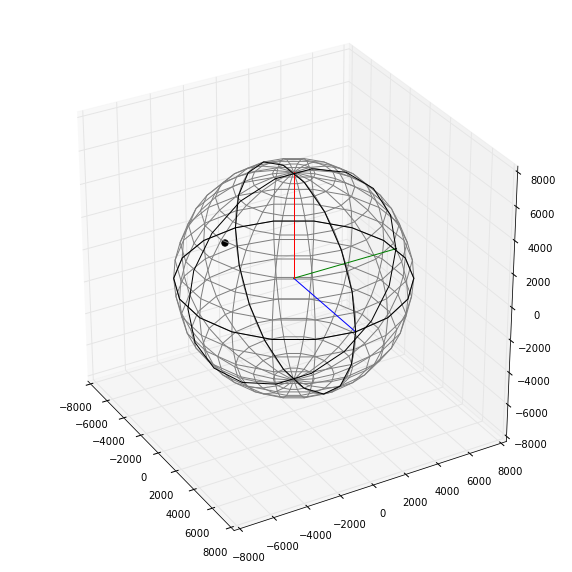

In [6]:
# Test gspToGcar (graphic)
fig = plt.figure(figsize(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D([0,Rav],[0,0],[0,0],'b')
ax.plot3D([0,0],[0,Rav],[0,0],'g')
ax.plot3D([0,0],[0,0],[0,Rav],'r')
u = np.linspace(0, 2 * np.pi, 19)
v = np.linspace(0, np.pi, 19)
tx = Rav * np.outer(np.cos(u), np.sin(v))
ty = Rav * np.outer(np.sin(u), np.sin(v))
tz = Rav * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(tx,ty,tz,color='grey')
ax.plot3D(Rav*np.cos(u),Rav*np.sin(u),'k')
ax.plot3D(np.zeros(np.size(u)),Rav*np.cos(u),Rav*np.sin(u),'k')
ax.plot3D(Rav*np.cos(u),np.zeros(np.size(u)),Rav*np.sin(u),'k')
ax.scatter3D(X,Y,Z,marker='o',c='k',s=40)
ax.view_init(30,-30)

In [7]:
# Test gcarToLcar
(gclat, gclon, Re) = geodToGeoc(lat, lon)
print 'Earth radius {:5.4f} km'.format(Re)
(gX, gY, gZ) = gspToGcar(gclat, gclon, Re+alt)
gX,gY,gZ = gX+100.,gY+0.,gZ+100. 
print 'Global--> X: {:5.4f} km; Y: {:5.4f} km; Z: {:5.4f} km; |P| = {:5.4f}'.format(gX,gY,gZ,sqrt(gX**2+gY**2+gZ**2))
(lX, lY, lZ) = gcarToLcar(gX, gY, gZ, gclat, gclon, Re+alt)
print 'Local--> X: {:5.4f} km; Y: {:5.4f} km; Z: {:5.4f} km; |P| = {:5.4f}'.format(lX,lY,lZ,sqrt(lX**2+lY**2+lZ**2))
(gX, gY, gZ) = gcarToLcar(lX, lY, lZ, gclat, gclon, Re+alt, inverse=True)
print 'Global--> X: {:5.4f} km; Y: {:5.4f} km; Z: {:5.4f} km; |P| = {:5.4f}'.format(gX,gY,gZ,sqrt(gX**2+gY**2+gZ**2))
gX,gY,gZ = gX-100.,gY-0.,gZ-100. 
(gclat, gclon, rho) = gspToGcar(gX, gY, gZ, inverse=True)
(gdlat, gdlon, Re) = geodToGeoc(gclat, gclon, inverse=True)
print 'Geodetic latitude: {:5.4f}'.format(gdlat)+unichr(176)+'N, longitude: {:5.4f}'.format(gdlon)+unichr(176)+'E'
print 'Altitude {:5.4f} km'.format(rho-Re)

Earth radius 6369.3676 km
Global--> X: 1386.2121 km; Y: -4800.2089 km; Z: 4242.0249 km; |P| = 6554.2631
Local--> X: 96.5926 km; Y: 60.2456 km; Z: 83.9068 km; |P| = 141.4214
Global--> X: 1386.2121 km; Y: -4800.2089 km; Z: 4242.0249 km; |P| = 6554.2631
Geodetic latitude: 40.0000°N, longitude: -75.0000°E
Altitude 100.0000 km


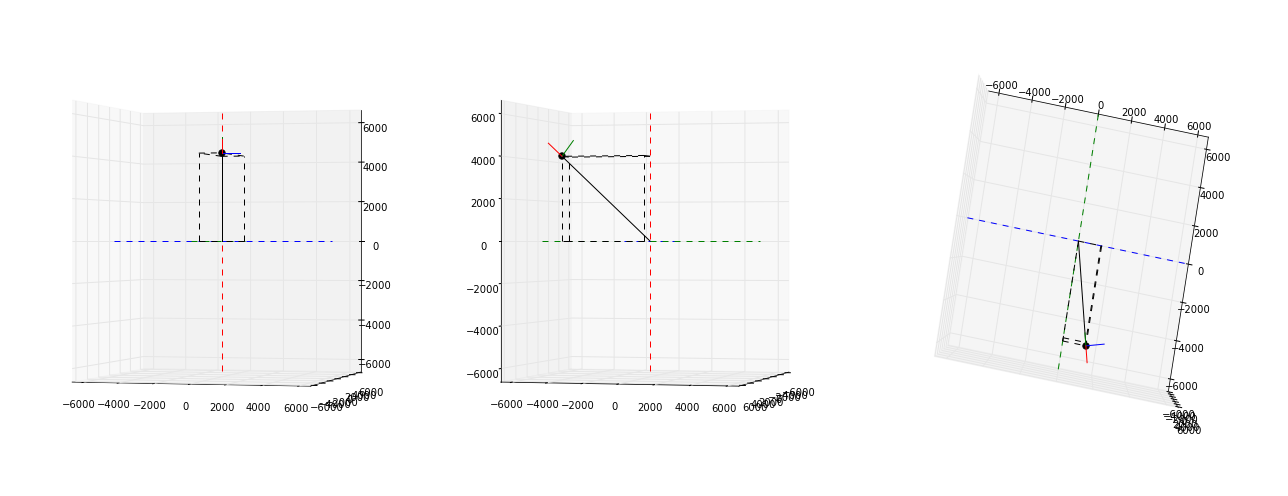

In [8]:
# Draw 3d axes and plot point
def set_axes_3d(ax):
    # Plot global axis
    ax.plot3D([-Rav,Rav],[0,0],[0,0],'b--')
    ax.plot3D([0,0],[-Rav,Rav],[0,0],'g--')
    ax.plot3D([0,0],[0,0],[-Rav,Rav],'r--')
    # Plot position and projections
    ax.plot3D([0,gX],[0,gY],[0,gZ],'k')
    ax.plot3D([gX,gX],[0,gY],[gZ,gZ],'k--')
    ax.plot3D([0,0],[0,gY],[gZ,gZ],'k--')
    ax.plot3D([gX,gX],[0,gY],[0,0],'k--')
    ax.plot3D([0,gX],[gY,gY],[gZ,gZ],'k--')
    ax.plot3D([0,gX],[0,0],[gZ,gZ],'k--')
    ax.plot3D([0,gX],[gY,gY],[0,0],'k--')
    ax.plot3D([gX,gX],[gY,gY],[0,gZ],'k--')
    ax.plot3D([0,0],[gY,gY],[0,gZ],'k--')
    ax.plot3D([gX,gX],[0,0],[0,gZ],'k--')
    ax.scatter3D(gX,gY,gZ,marker='o',c='k',s=40)
    ax.set_xlim([-Rav,Rav])
    ax.set_ylim([-Rav,Rav])
    ax.set_zlim([-Rav,Rav])
    # Plot local axis
    (xax, xay, xaz) = gcarToLcar(llim, 0., 0., gclat, gclon, Re+alt, inverse=True)
    (yax, yay, yaz) = gcarToLcar(0, llim, 0, gclat, gclon, Re+alt, inverse=True)
    (zax, zay, zaz) = gcarToLcar(0, 0, llim, gclat, gclon, Re+alt, inverse=True)
    ax.plot3D([gX,xax],[gY,xay],[gZ,xaz],'b')
    ax.plot3D([gX,yax],[gY,yay],[gZ,yaz],'g')
    ax.plot3D([gX,zax],[gY,zay],[gZ,zaz],'r')

# Test gcarToLcar (graphic)
fig = plt.figure(figsize(18,7))
llim = 1000.

# Plot global position (Longitude plane)
ax = fig.add_subplot(131, projection='3d')
set_axes_3d(ax)
ax.view_init(0,lon)

# Plot global position (Longitude+90. plane)
ax = fig.add_subplot(132, projection='3d')
set_axes_3d(ax)
ax.view_init(0,lon+90.)

# Plot global position (Top plane)
ax = fig.add_subplot(133, projection='3d')
set_axes_3d(ax)
ax.view_init(90,lon)

tight_layout()

In [9]:
# Test lspToLcar
(gclat, gclon, Re, gaz, gel) = geodToGeocAzEl(lat,lon,az,el)
print 'Earth radius {:5.4f} km'.format(Re)
(lX, lY, lZ) = lspToLcar(gaz, gel, dist)
print 'Local--> X: {:5.4f} km; Y: {:5.4f} km; Z: {:5.4f} km |P| = {:5.4f}'.format(lX,lY,lZ,sqrt(lX**2+lY**2+lZ**2))
(gX, gY, gZ) = gcarToLcar(lX, lY, lZ, gclat, gclon, Re+alt, inverse=True)
print 'Global--> X: {:5.4f} km; Y: {:5.4f} km; Z: {:5.4f} km |P| = {:5.4f}'.format(gX,gY,gZ,sqrt(gX**2+gY**2+gZ**2))
(gclat, gclon, rho) = gspToGcar(gX, gY, gZ, inverse=True)
(gdlat, gdlon, Re) = geodToGeoc(gclat, gclon, inverse=True)
print 'Geodetic latitude: {:5.4f}'.format(gdlat)+unichr(176)+'N, longitude: {:5.4f}'.format(gdlon)+unichr(176)+'E'
print 'Altitude {:5.4f} km'.format(rho-Re)
(laz, lel, ldist) = lspToLcar(lX, lY, lZ, inverse=True)
print 'Local Azimuth: {:5.4f}'.format(laz)+unichr(176)+', elevation: {:5.4f}'.format(lel)+unichr(176)+'E'
(gclat, gclon, Re, gdaz, gdel) = geodToGeocAzEl(gclat,gclon,laz,lel,inverse=True)
print 'Global Azimuth: {:5.4f}'.format(gdaz)+unichr(176)+', elevation: {:5.4f}'.format(gdel)+unichr(176)+'E'
print 'Distance {:5.4f} km'.format(ldist)

Earth radius 6369.3676 km
Local--> X: -49.5549 km; Y: 136.2786 km; Z: 38.3726 km |P| = 150.0000
Global--> X: 1223.3922 km; Y: -4757.2272 km; Z: 4271.2775 km |P| = 6509.3556
Geodetic latitude: 41.1995°N, longitude: -75.5780°E
Altitude 140.4298 km
Local Azimuth: -19.9828°, elevation: 14.8220°E
Global Azimuth: -20.0001°, elevation: 15.0012°E
Distance 150.0000 km


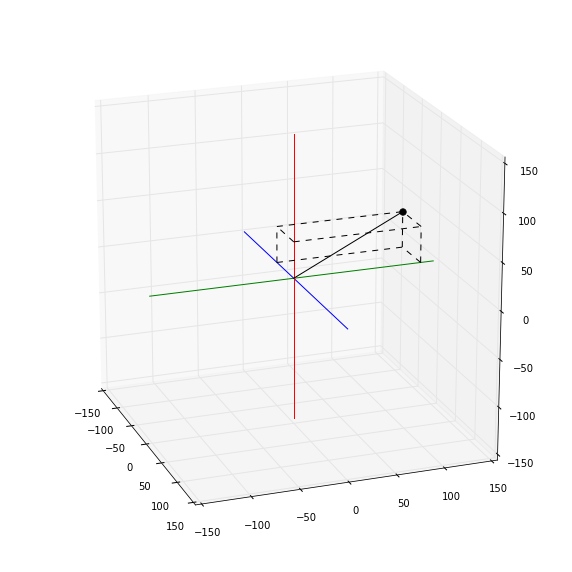

In [10]:
# Test lspToLcar (graphic)
llim = dist
fig = plt.figure(figsize(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D([-llim,llim],[0,0],[0,0],'b')
ax.plot3D([0,0],[-llim,llim],[0,0],'g')
ax.plot3D([0,0],[0,0],[-llim,llim],'r')
ax.plot3D([0,lX],[0,lY],[0,lZ],'k')
ax.plot3D([lX,lX],[0,lY],[lZ,lZ],'k--')
ax.plot3D([0,0],[0,lY],[lZ,lZ],'k--')
ax.plot3D([lX,lX],[0,lY],[0,0],'k--')
ax.plot3D([0,lX],[lY,lY],[lZ,lZ],'k--')
ax.plot3D([0,lX],[0,0],[lZ,lZ],'k--')
ax.plot3D([0,lX],[lY,lY],[0,0],'k--')
ax.plot3D([lX,lX],[lY,lY],[0,lZ],'k--')
ax.plot3D([0,0],[lY,lY],[0,lZ],'k--')
ax.plot3D([lX,lX],[0,0],[0,lZ],'k--')
ax.scatter3D(lX,lY,lZ,marker='o',c='k',s=40)
ax.set_xlim([-llim,llim])
ax.set_ylim([-llim,llim])
ax.set_zlim([-llim,llim])
ax.view_init(20,-20)

In [11]:
# Test calcDistPnt
dict = calcDistPnt(lat, lon, alt, 
    dist=dist, el=el, az=az)
print 'Distant point latitude: {:5.4f}'.format(dict['distLat'])+unichr(176)+ \
    'N, longitude: {:5.4f}'.format(dict['distLon'])+unichr(176)+ \
    'E, altitude {:5.4f} km'.format(dict['distAlt'])

dict = calcDistPnt(lat, lon, alt, 
    distLat=dict['distLat'], distLon=dict['distLon'], distAlt=dict['distAlt'])
print 'Pointing Azimuth: {:5.4f}'.format(dict['az'])+unichr(176)+', elevation: {:5.4f}'.format(dict['el'])+unichr(176)+'E and distance: {:5.4f}'.format(dict['dist'])

Distant point latitude: 41.1995°N, longitude: -75.5780°E, altitude 140.4298 km
Pointing Azimuth: -20.0000°, elevation: 15.0000°E and distance: 150.0000
